# Module 13 - Programming Assignment

## Directions

There are general instructions on Blackboard and in the Syllabus for Programming Assignments. This Notebook also has instructions specific to this assignment. Read all the instructions carefully and make sure you understand them. Please ask questions on the discussion boards or email me at `EN605.445@gmail.com` if you do not understand something.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
Please follow the directions and make sure you provide the requested output. Failure to do so may result in a lower grade even if the code is correct or even 0 points.
</div>

You must submit your assignment as `<jhed_id>.ipynb` but DO NOT submit the supplementary files. Thanks!

## k Nearest Neighbors and Model Evaluation

You must complete the 4 following tasks:

1. Implement k-Nearest Neighbor *regression* as described in the Module.
2. Use validation curves as described in Module 9 to determine the best value of k trying values of 1 to 10. (You don't need to use odd values for regression). For this you can simply split the data randomly into a training and a test set with a 67/33 split.
3. Use learning curves as described in Module 9 to determine if your model could use more data.
    For this you can simply split the data randomly into a training and a test set with a 67/33 split. Use the best k from part 2.
4. Use 10-fold cross-validation to establish confidence bounds on your model's performance. Calculate the mean (average) MSE (which sounds funny, I know) and the standard deviation. 

Additionally, because you can't be *wrong* with the k = 1 in the training data, your curves will look a little funky initially.

As before make sure you actually plot curves and that everything is labeled. Each chart from part #2 and #3 has *two* curves. Please review the comments to Module 9 if you're not sure why.

Use the data in concrete_compressive_strength.csv for this assignment obtainable at [UCI ML Repository - Concrete Compressive Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength).

Because the data is always the model, for knn, you simply need a function `knn` that will take the data, a value for k, and a List of instances and return a List of predictions (in this case, we're doing regression...you don't have to write a version of `knn` that would do either).

As before there's a lot of infrastructure involved and the specific names I leave up to you as long as you clearly indicate your answers to 1-4 above.

-----

In [32]:
import csv
from collections import defaultdict
from math import sqrt
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np


def read_csv_file(filename):
    """ Read in the data from the provided file and return as two shuffled sets of data.

    Args:
        filename: Provided file name to read from.

    Returns:
        Two shuffled lists of input data from the provided filename.
    """
    rows = []

    # read in the data, replacing the single character domain with the full word
    with open(filename, 'r') as csvfile:
        rows = [row for row in csv.reader(csvfile)]

    # randomize the rows of input
    shuffle(rows)
    shuffle(rows)

    # return two sets of data
    set1, set2 = np.array_split(rows, [int(len(rows) * .67)])
    return set1.tolist(), set2.tolist()

**Task #1**

**kNN Function**

This function that performs knn as described in this module's pseudocode.

This function performs kNN on test_data by using the "model" of training_data.
The function will output a dict that contains the mean squared error for all
values of k where minK <= k <= maxK.

Instead of having this function return the values of the nearest neighbors,
I've chosen to return the mean squared error. By doing this, the same set
of sorted neighbors can be saved and reused, which greatly speeds up
kNN on the same data for different k values.

```
Args:
    minK: The lower bound of k for kNN to perform.
    maxK: The upper bound of k for kNN to perform.
    test_data: The "test" data for kNN.
    training_data: The "training" data for kNN.

Returns:
    Dict containing key of the "k" value mapped to its MSE.
```

-----

In [33]:
def knn(minK, maxK, test_data, training_data):
    """ Function that performs knn as described in this module's pseudocode.

    This function performs kNN on test_data by using the "model" of training_data.
    The function will output a dict that contains the mean squared error for all
    values of k where minK <= k <= maxK.

    Instead of having this function return the values of the nearest neighbors,
    I've chosen to return the mean squared error. By doing this, the same set
    of sorted neighbors can be saved and reused, which greatly speeds up
    kNN on the same data for different k values.

    Args:
        minK: The lower bound of k for kNN to perform.
        maxK: The upper bound of k for kNN to perform.
        test_data: The "test" data for kNN.
        training_data: The "training" data for kNN.

    Returns:
        Dict containing key of the "k" value mapped to its MSE.

    """
    kNN_error = defaultdict(lambda: 0.0)

    for set in test_data:
        distances = []
        for data_item in training_data:
            distance = sum([((float(data_item[i]) - float(set[i])) ** 2) for i in range(0, len(set) - 1)])
            distances.append((sqrt(distance), data_item[len(data_item) - 1]))
        # sort primarily by the distances, and if there are ties (there are, in this dataset)
        # sort by smallest class label
        sorted_vals = sorted(distances, key=lambda x: (x[0], x[1]))
        for i in range(minK, maxK + 1):
            k_nearest = [float(tup[1]) for tup in sorted_vals[:i]]
            kNN_error[i] += (np.mean(k_nearest) - float(set[len(set) - 1])) ** 2

    for i in range(minK, maxK + 1):
        kNN_error[i] /= len(test_data)
    return kNN_error

**Task #2**

**Validation curves**

Performs kNN using k values of 1 to 10 on randomly shuffled data that uses a 67/33 split between training and test sets. Outputs a plot with the validation curves.


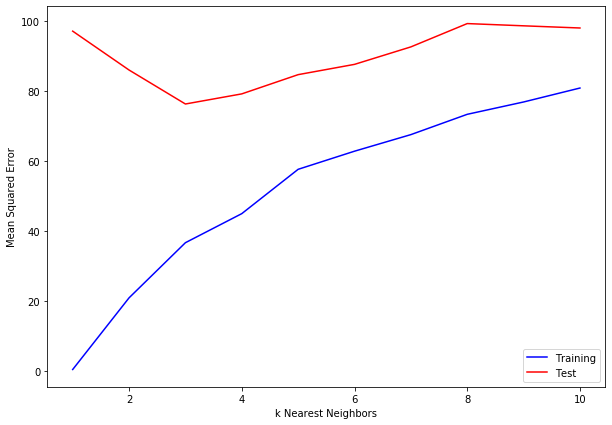

In [34]:
# Task #2
training_data, test_data = read_csv_file('concrete_compressive_strength(1).csv')
kNN_test_errors = defaultdict(lambda: 0.0)
kNN_training_errors = defaultdict(lambda: 0.0)
verbose = False

kNN_test_errors = knn(1, 10, test_data, training_data)
kNN_training_errors = knn(1, 10, training_data, training_data)

for k in range(1, 11):
    if verbose:
        print(f'Test k:{k} score {kNN_test_errors[k]}')
plt.figure(figsize=(10, 7))
plt.plot(list(kNN_training_errors.keys()), list(kNN_training_errors.values()), color='b', label='Training')
plt.plot(list(kNN_test_errors.keys()), list(kNN_test_errors.values()), color='r', label='Test')
plt.xlabel('k Nearest Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

-----

**Task #3**

**Learning curves**

This performs kNN using k value of 3 on randomly shuffled data that uses a 67/33 split between training and test sets. Outputs a plot with the learning curves by calculate the MSE by starting with 10% of the training set and increasing by 10% until we reach 100% of the training data.

The value of 3 was chosen after running the validation curves 50 times, keeping a log of the most used k-values.

These learning curves demonstrate that more data would most likely benefit from more data. The test curve is still headed at a downward slope at 100% of training data being used, although it has level out somewhat. I suspect that this dataset would benefit from both more data as well as more features in order to see a big increase in prediction accuracy using kNN.


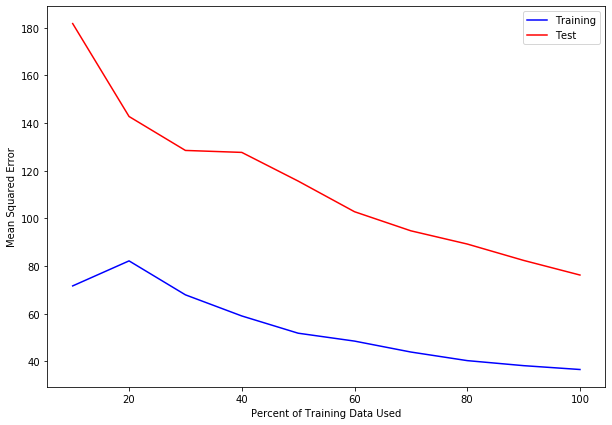

In [35]:
# Task #3
percent = 10
kNN_test_errors = {}
kNN_training_errors = {}
while percent <= 100:
    training_data_subset = training_data[:int(percent * 0.01 * len(training_data))]
    kNN_test_errors[percent] = knn(3, 3, test_data, training_data_subset)[3]
    kNN_training_errors[percent] = knn(3, 3, training_data_subset, training_data_subset)[3]
    if verbose:
        print(f'Test k=3 Percentage of Training Data Used: {percent}% MSE: {kNN_test_errors[percent]}')
    percent += 10
plt.figure(figsize=(10, 7))
plt.plot(list(kNN_training_errors.keys()), list(kNN_training_errors.values()), color='b', label='Training')
plt.plot(list(kNN_test_errors.keys()), list(kNN_test_errors.values()), color='r', label='Test')
plt.xlabel('Percent of Training Data Used')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

-----

**Task #4**

**Cross Validation**

This code performs 10-fold cross validation of kNN (using k-value 3), and outputs the mean MSE and the standard deviation.



In [36]:
# Task #4
data = training_data + test_data
num_chunks = 10
chunks = np.array_split(data, 10)
kNN_test_errors = {}
kNN_training_errors = {}
knn_errors = []
for i in range(0, num_chunks):
    test_chunk = chunks[i]
    training_chunks = np.delete(chunks, i, 0).reshape(int(len(data) - len(data) / num_chunks), len(data[0]))
    knn_errors.append(knn(3, 3, test_chunk, training_chunks)[3])
    if verbose:
        print(f'Test error {i}: {knn_errors[i]}')
print(f'Mean MSE: {np.mean(knn_errors)}')
print(f'MSE Std Dev: {np.std(knn_errors)}')


Mean MSE: 72.12459871628911
MSE Std Dev: 9.264484854792427


-----

## Discussion

**1. Compare and contrast linear regression and kNN for a regression problem. What are the various pros/cons for each algorithm?**

n/a based on discussion post

**2\. Will more data always make a model better? How do learning curves fit into this?**

No, more data does not always make a model better. In the event that our model has high bias (or low variance), the test and train curves will be very close together when we use 100% of our training set. In this case more data will not help. Instead, more features or transformations could help. This is referred to as "the model dominating the data."

More data is helpful in the case of low bias (or high variance). In this case, the test and train curves would be farther apart, and this is referred to as "the data dominates the model".

**3\. Why can't you use test or evaluate your model on the same data you trained it with? How does cross-validation fit into this? Do learning curves violate this?**

The reason that you can't test or evaluate your model using the training data is because it's the model's data- that is, it is information that the model already "knows". If you were to test using the model's data, it *should* be able to predict the correct answer with (close to) 100% certainty, and this should not be impressive.

In cross-validation, it is essential to not include the chosen "test" chunk in the other "training" chunks. The reason for this is exactly what we identified above- that the model already "knows" the training data, and testing it does not demonstrate and qualities of prediction. 

Learning curves to not violate the idea of testing your model with training data. The purpose of learning curves is to see the effect on the accuracy of the test curve as your increase the quantity of training data used. It can help you identify whether or not your model needs more data.

## Final Project

This weeks' assignment is intentionally a bit easier so that you can get an early jumpstart on your Capstone Project.

Read the directions for the "Capstone Project" (Final Programming Assignment) and note any questions you have and ask them in the appropriate discussion forum. Start getting your code together and thinking about what modifications you might need to make. Determine what, if any, code is missing.